In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.offline as py
import os

sns.set(style='darkgrid')

df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:

df.columns = ['Age', 'Sex', 'Chest_pain_type', 'Resting_bp', 'Cholesterol', 'Fasting_bs', 'Resting_ecg',
            'Max_heart_rate', 'Exercise_induced_angina', 'ST_depression', 'ST_slope', 'Num_major_vessels',
            'Thallium_test', 'Condition']

df.head()
df.describe()
df.info()

# Data types, missing values
print()
print(f'Shape of the dataset')
print(f'Number of Features: {df.shape[1]}')
print(f'Number of Observations: {df.shape[0]}')

df.isnull().sum()               # Check missing values



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      303 non-null    int64  
 1   Sex                      303 non-null    int64  
 2   Chest_pain_type          303 non-null    int64  
 3   Resting_bp               303 non-null    int64  
 4   Cholesterol              303 non-null    int64  
 5   Fasting_bs               303 non-null    int64  
 6   Resting_ecg              303 non-null    int64  
 7   Max_heart_rate           303 non-null    int64  
 8   Exercise_induced_angina  303 non-null    int64  
 9   ST_depression            303 non-null    float64
 10  ST_slope                 303 non-null    int64  
 11  Num_major_vessels        303 non-null    int64  
 12  Thallium_test            303 non-null    int64  
 13  Condition                303 non-null    int64  
dtypes: float64(1), int64(13)
m

,0
Age,0
Sex,0
Chest_pain_type,0
Resting_bp,0
Cholesterol,0
Fasting_bs,0
Resting_ecg,0
Max_heart_rate,0
Exercise_induced_angina,0
ST_depression,0


In [9]:
def condition_ratio(data):
    """
    Make a pie chart of 'Condition' values
    Condition: 0 = Benign, 1 = Malignant
    """
    results = data['Condition'].value_counts()
    values = [results[0], results[1]]
    labels = ['Benign', 'Malignant']
    colors = ['MediumSeaGreen', 'Coral']

    fig_pie = go.Pie(labels=labels, values=values,
                     marker={'colors': colors,
                             'line': {'color': 'Black', 'width': 2}})
    py.iplot([fig_pie])
    return py


condition_ratio(df);

In [10]:
def sex_ratio(data):
    """
    Make a pie chart of 'Sex' values
    Sex: 0 = Female, 1 = Male
    """
    # Pie chart of sex ratio
    results = data['Sex'].value_counts()
    values = [results[0], results[1]]
    labels = ['Female', 'Male']
    colors = ['Red', 'RoyalBlue']

    fig_pie = go.Pie(labels=labels, values=values,
                     marker={'colors': colors,
                             'line': {'color': 'Black', 'width': 2}})
    py.iplot([fig_pie])
    return py


sex_ratio(df);

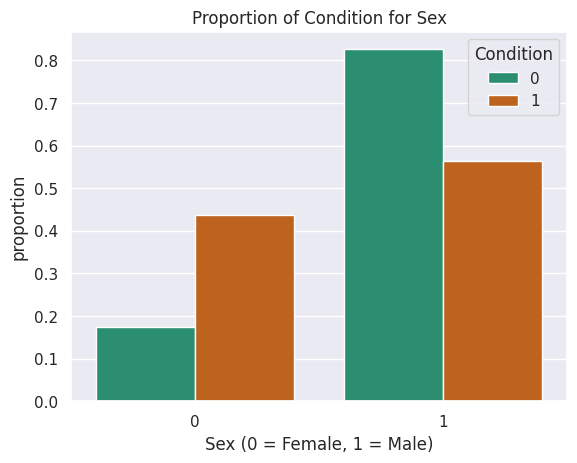

The proportion of Malignant for Sex:
Female: 43.64%
Male: 56.36%


In [11]:
def condition_proportion_sex(data):
    """
    Plot a bar chart of the proportion of Conditon vs. Sex.
    Show the percentage of Malignant for each sex.
    """
    # Bivariate analysis: Sex vs. Condition as a bar graph
    data['Sex'].groupby(data['Condition']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='Sex', y='proportion', hue='Condition', palette='Dark2');
    plt.title('Proportion of Condition for Sex')
    plt.xlabel('Sex (0 = Female, 1 = Male)')
    plt.show()


    # Show the percentage of Malignant for Sex
    # female_malignant vs. Malignant
    female_malignant = data[data['Sex']==0]['Condition'].sum()/data[data['Condition']==1]['Condition'].count()
    # male_malignant vs. Malignant
    male_malignant = data[data['Sex']==1]['Condition'].sum()/data[data['Condition']==1]['Condition'].count()

    print('The proportion of Malignant for Sex:')
    print(f'Female: {female_malignant:.2%}')
    print(f'Male: {male_malignant:.2%}')


condition_proportion_sex(df);

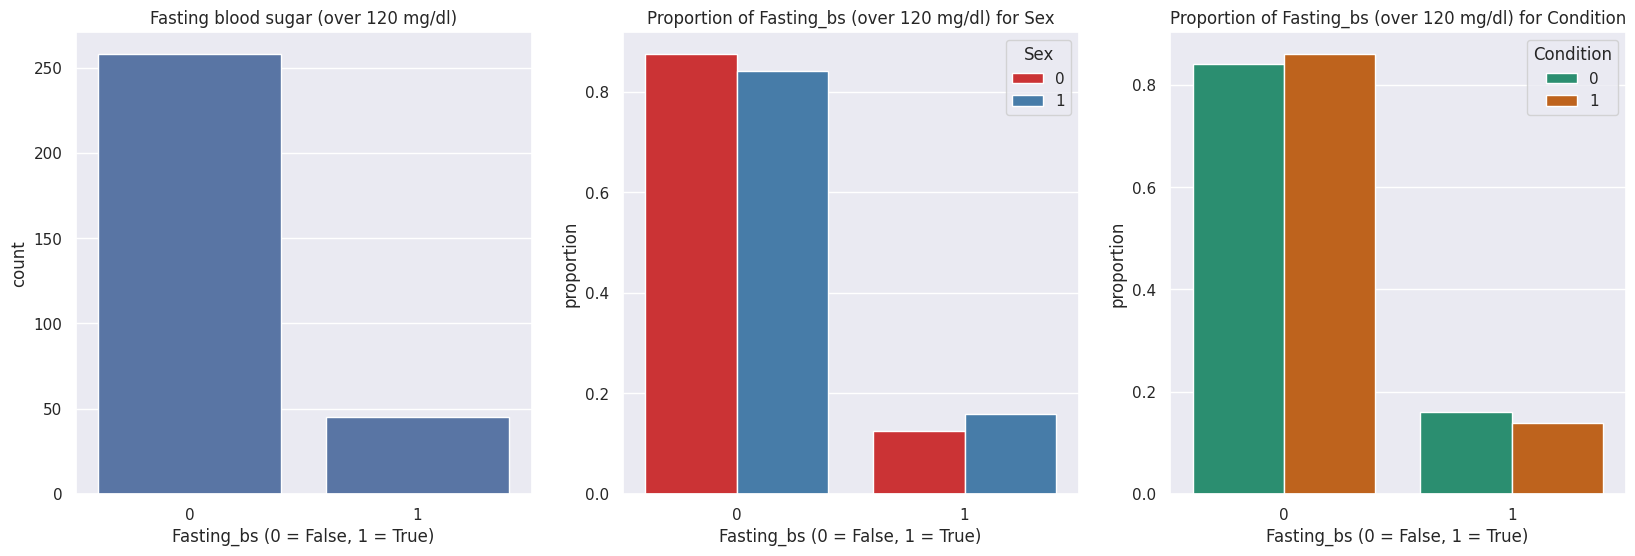

In [12]:
def risk_factors_fbs(data):
    """
    Plot bar charts of fasting blood sugar (over 120 mg/dl) and compare for Sex and Condition
    """
    fig = plt.figure(figsize=(20, 6))

    # Fasting blood sugar > 120 mg/dl
    plt.subplot(1, 3, 1)
    sns.countplot(x='Fasting_bs', data=data)
    plt.title('Fasting blood sugar (over 120 mg/dl)')
    plt.xlabel('Fasting_bs (0 = False, 1 = True)')


    # Fasting blood sugar for Sex
    plt.subplot(1, 3, 2)
    df['Fasting_bs'].groupby(df['Sex']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='Fasting_bs', y='proportion', hue='Sex', palette='Set1')
    plt.title('Proportion of Fasting_bs (over 120 mg/dl) for Sex')
    plt.xlabel('Fasting_bs (0 = False, 1 = True)')


    # Fasting blood sugar for Condition
    plt.subplot(1, 3, 3)
    df['Fasting_bs'].groupby(df['Condition']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='Fasting_bs', y='proportion', hue='Condition', palette='Dark2')
    plt.title('Proportion of Fasting_bs (over 120 mg/dl) for Condition')
    plt.xlabel('Fasting_bs (0 = False, 1 = True)')
    plt.show()


risk_factors_fbs(df);

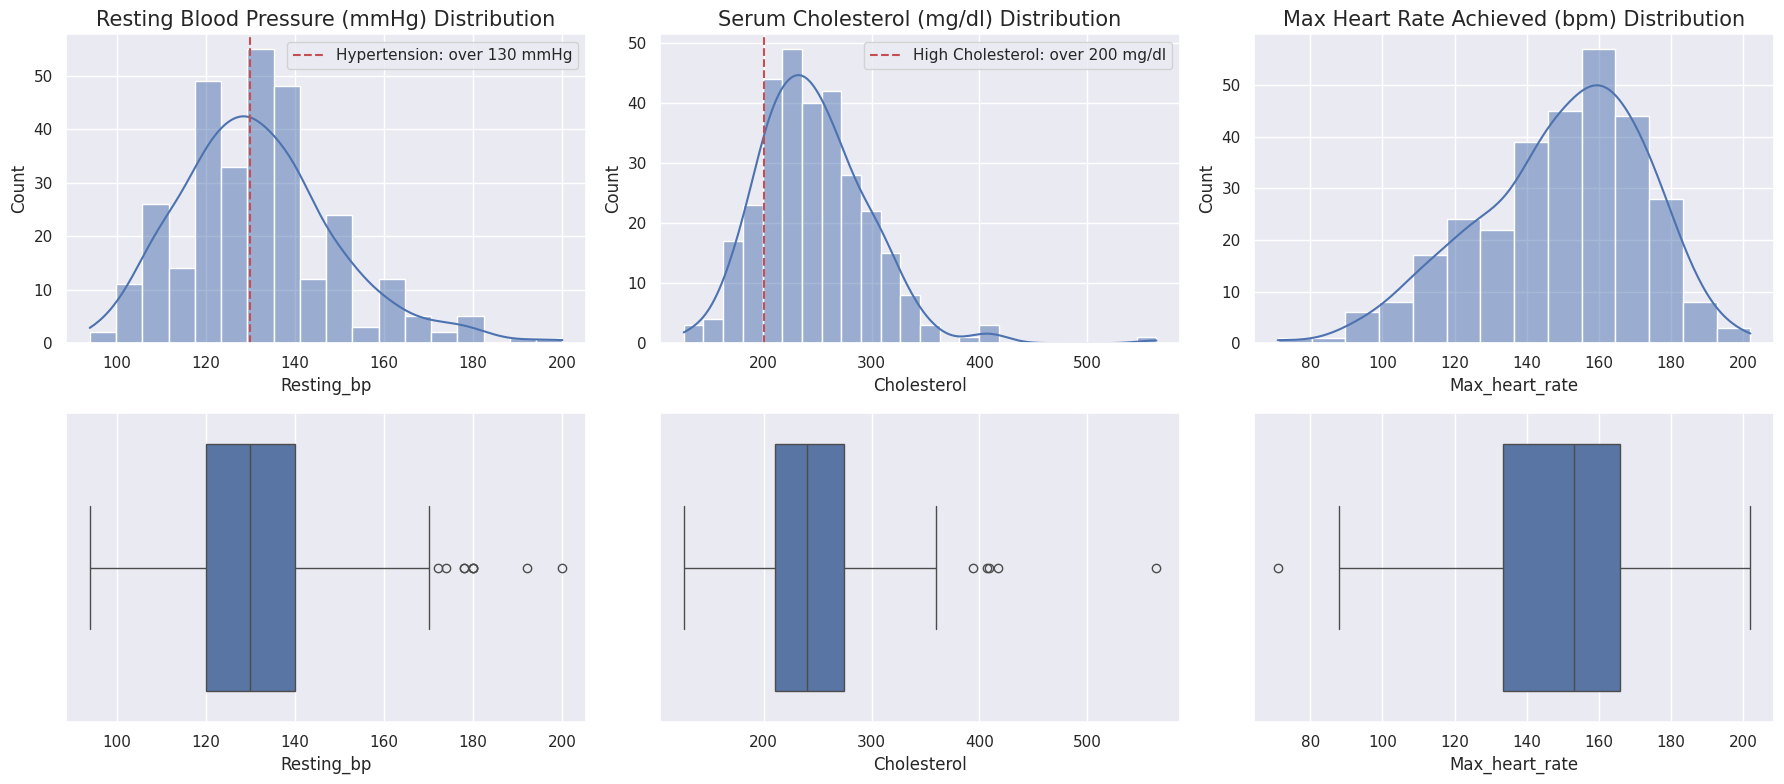

In [20]:
def risk_factors_dist(data):
    """
    Show distributions of risk factors, Resting_bp, Cholesterol, and Max_heart_rate
    """
    fig = plt.figure(figsize=(18, 8))

    # Resting blood pressure
    plt.subplot(2, 3, 1)
    sns.histplot(data['Resting_bp'], kde=True)
    plt.title('Resting Blood Pressure (mmHg) Distribution', fontsize=15)
    plt.axvline(x=130, color='r', linestyle='--', label='Hypertension: over 130 mmHg')
    plt.legend()

    plt.subplot(2, 3, 4)
    sns.boxplot(data['Resting_bp'], orient='h')

    # Serum cholesterol
    plt.subplot(2, 3, 2)
    sns.histplot(data['Cholesterol'], kde=True)
    plt.title('Serum Cholesterol (mg/dl) Distribution', fontsize=15)
    plt.axvline(x=200, color='r', linestyle='--', label='High Cholesterol: over 200 mg/dl')
    plt.legend()

    plt.subplot(2, 3, 5)
    sns.boxplot(data['Cholesterol'], orient='h')

    # Maximum heart rate
    plt.subplot(2, 3, 3)
    sns.histplot(data['Max_heart_rate'], kde=True)
    plt.title('Max Heart Rate Achieved (bpm) Distribution', fontsize=15)

    plt.subplot(2, 3, 6)
    sns.boxplot(data['Max_heart_rate'], orient='h')

    plt.tight_layout()
    plt.show()

risk_factors_dist(df)

In [1]:
 def risk_factors_dist_sex(data):
    """
    Show distributions of risk factors for each sex
    """
    fig = plt.figure(figsize=(18, 8))

    # Resting blood pressure for each sex
    plt.subplot(2, 3, 1)
    trestbps_female = data[data['Sex']==0]['Resting_bp']
    trestbps_male = data[data['Sex']==1]['Resting_bp']
    sns.displot(trestbps_female, color='Red')
    sns.displot(trestbps_male, color='Blue')
    plt.title('Resting Blood Pressure (mmHg) Distribution for Each Sex')
    plt.gca().legend(title='Sex', labels=['Female','Male'])
    plt.axvline(x=130, color='r', linestyle='--', label='Hypertension: over 130 mmHg')

    plt.subplot(2, 3, 4)
    sns.boxplot(x=data['Resting_bp'], y=data['Sex'],
                palette='Set1', orient='h')


    # Serum cholesterol distribution for each sex
    plt.subplot(2, 3, 2)
    chol_female = data[data['Sex']==0]['Cholesterol']
    chol_male = data[data['Sex']==1]['Cholesterol']
    sns.displot(chol_female, color='Red')
    sns.displot(chol_male, color='Blue')
    plt.title('Serum Cholesterol (mg/dl) Distribution for Each Sex')
    plt.gca().legend(title='Sex', labels=['Female','Male'])
    plt.axvline(x=200, color='r', linestyle='--', label='High Cholesterol: over 200 mg/dl')

    plt.subplot(2, 3, 5)
    sns.boxplot(x=data['Cholesterol'], y=data['Sex'],
                palette='Set1', orient='h')


    # Max heart rate distribution for each sex
    plt.subplot(2, 3, 3)
    thalach_female = data[data['Sex']==0]['Max_heart_rate']
    thalach_male = data[data['Sex']==1]['Max_heart_rate']
    sns.displot(thalach_female, color='Red')
    sns.displot(thalach_male, color='Blue')
    plt.title('Max Heart Rate (bpm) Distribution for Each Sex')
    plt.gca().legend(title='Sex', labels=['Female','Male'])

    plt.subplot(2, 3, 6)
    sns.boxplot(x=data['Max_heart_rate'], y=data['Sex'],
                palette='Set1', orient='h')

    plt.tight_layout()
    plt.show()


risk_factors_dist_sex(df);

NameError: name 'df' is not defined

<ipython-input-16-566663e64b42>:11: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-16-566663e64b42>:12: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-16-566663e64b42>:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` v

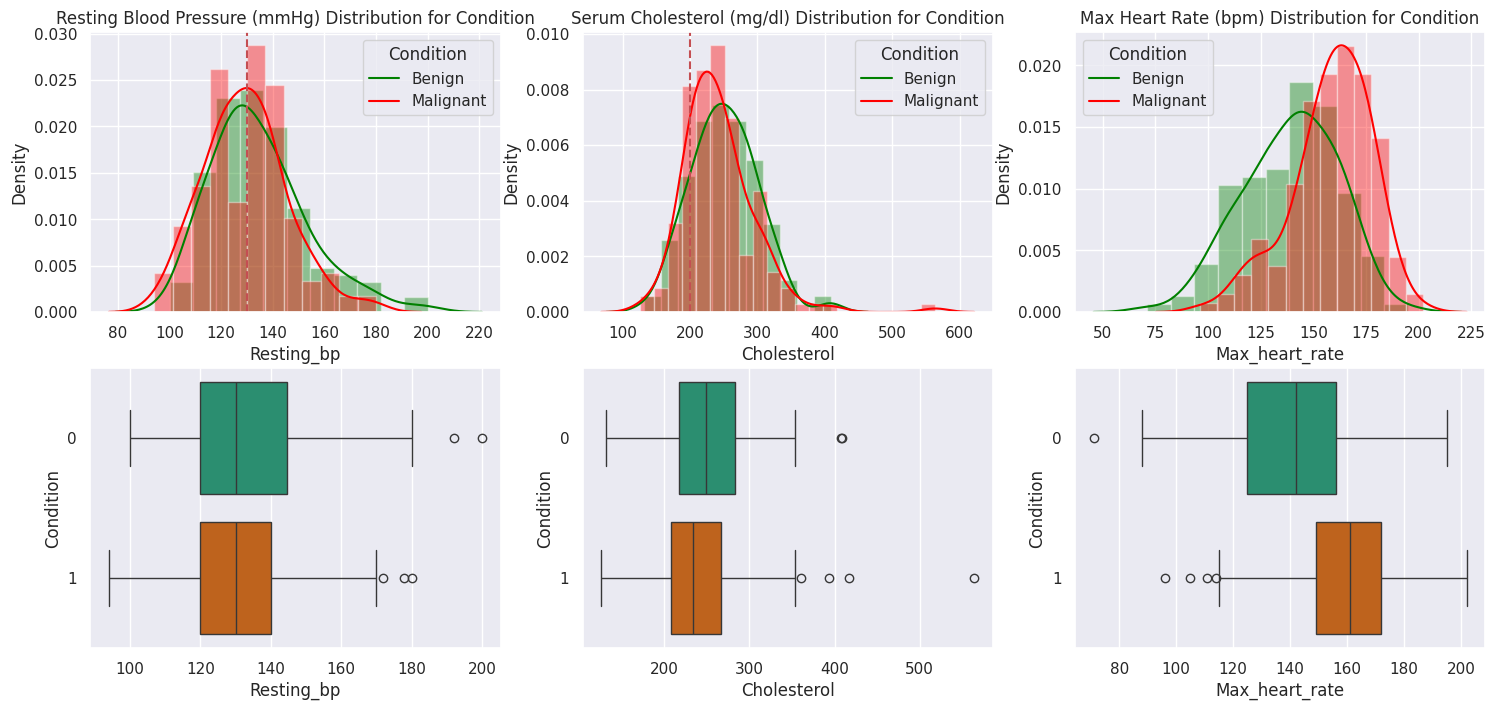

In [ ]:
def risk_factors_dist_condition(data):
    """
    Show distributions of risk factors for each condition
    """
    fig = plt.figure(figsize=(18, 8))

    # Resting blood pressure distribution for each condition
    plt.subplot(2, 3, 1)
    trestbps_b = data[data['Condition']==0]['Resting_bp']
    trestbps_m = data[data['Condition']==1]['Resting_bp']
    sns.distplot(trestbps_b, color='Green')
    sns.distplot(trestbps_m, color='Red')
    plt.title('Resting Blood Pressure (mmHg) Distribution for Condition')
    plt.gca().legend(title='Condition', labels=['Benign','Malignant'])
    plt.axvline(x=130, color='r', linestyle='--', label='Hypertension: over 130 mmHg')

    plt.subplot(2, 3, 4)
    sns.boxplot(x=data['Resting_bp'], y=data['Condition'],
                orient='h', palette='Dark2')


    # Serum cholesterol distribution for each condition
    plt.subplot(2, 3, 2)
    chol_b = data[data['Condition']==0]['Cholesterol']
    chol_m = data[data['Condition']==1]['Cholesterol']
    sns.distplot(chol_b, color='Green')
    sns.distplot(chol_m, color='Red')
    plt.title('Serum Cholesterol (mg/dl) Distribution for Condition')
    plt.gca().legend(title='Condition', labels=['Benign','Malignant'])
    plt.axvline(x=200, color='r', linestyle='--', label='High Cholesterol: over 200 mg/dl')

    plt.subplot(2, 3, 5)
    sns.boxplot(x=data['Cholesterol'], y=data['Condition'],
                orient='h', palette='Dark2')


    # Max heart rate achieved distribution for each condition
    plt.subplot(2, 3, 3)
    thalach_b = data[data['Condition']==0]['Max_heart_rate']
    thalach_m = data[data['Condition']==1]['Max_heart_rate']
    sns.distplot(thalach_b, color='Green')
    sns.distplot(thalach_m, color='Red')
    plt.title('Max Heart Rate (bpm) Distribution for Condition')
    plt.gca().legend(title='Condition', labels=['Benign','Malignant'])

    plt.subplot(2, 3, 6)
    sns.boxplot(x=data['Max_heart_rate'], y=data['Condition'],
                orient='h', palette='Dark2')


risk_factors_dist_condition(df);

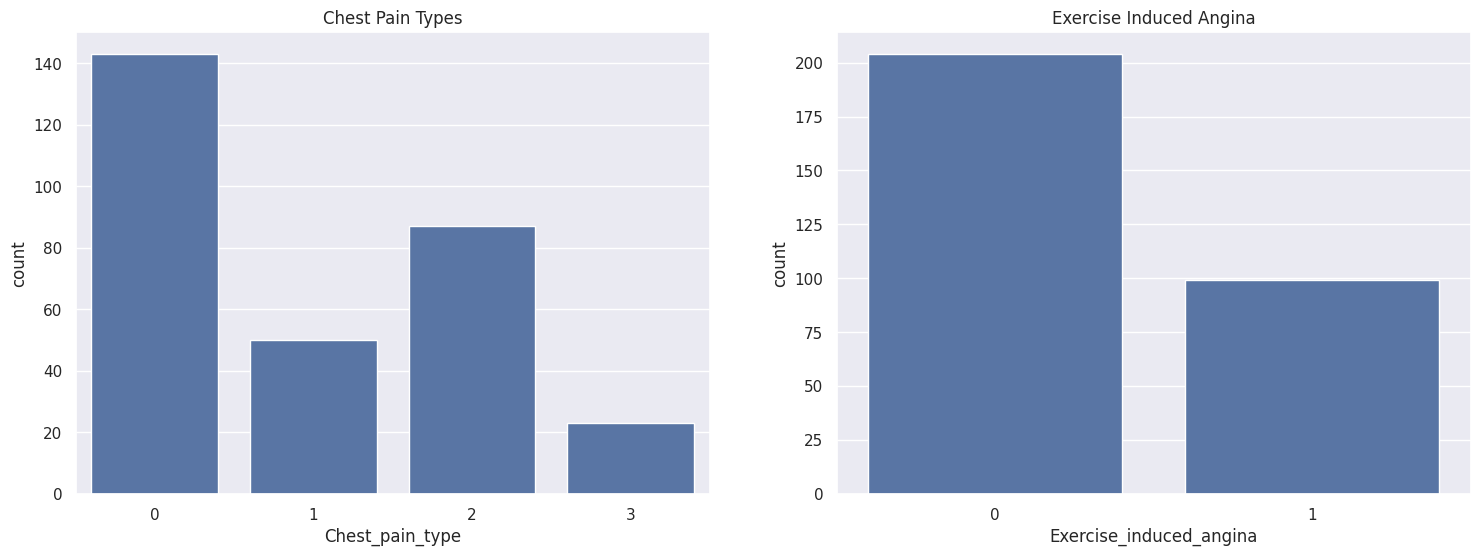

In [ ]:
def symptoms_features(data):
    """
    Count the number of Chest_pain_type and Exercise_induced_angina values.
    """
    plt.figure(figsize=(18, 6))

    # Chest pain types
    plt.subplot(1, 2, 1)
    sns.countplot(x='Chest_pain_type', data=data)
    plt.title('Chest Pain Types')


    # Exercise induced angina
    plt.subplot(1, 2, 2)
    sns.countplot(x='Exercise_induced_angina', data=data)
    plt.title('Exercise Induced Angina')


symptoms_features(df);

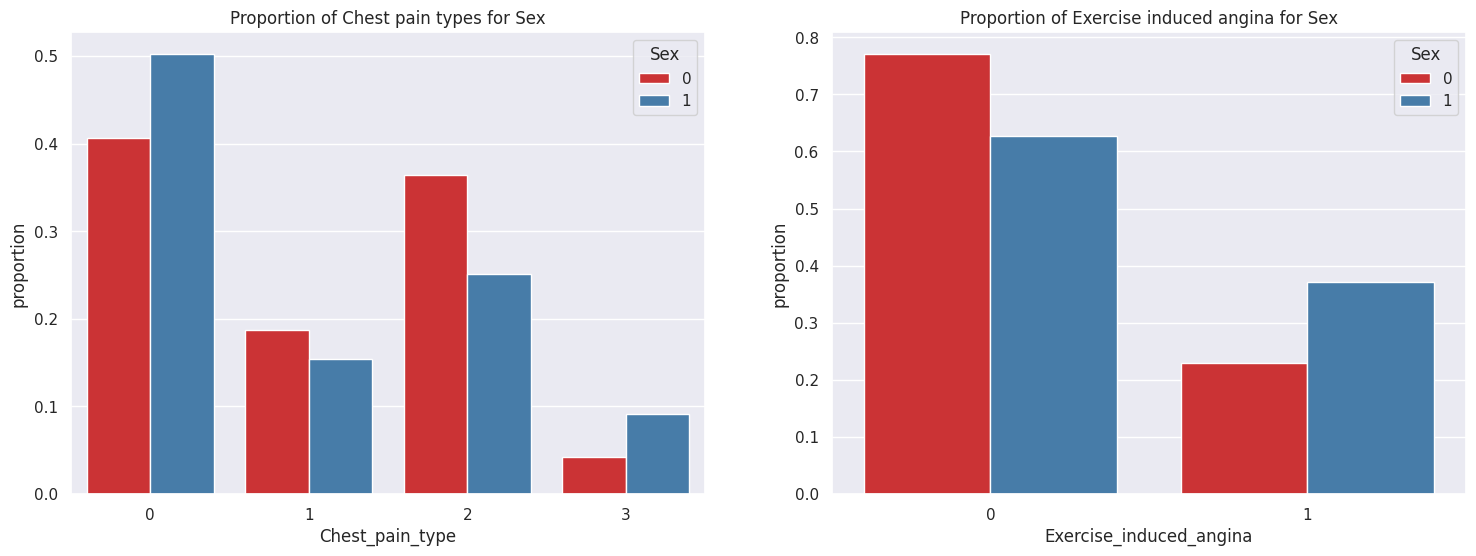

In [ ]:
def symptoms_features_sex(data):
    """
    Plot bar charts of chest pain type and exercise induced angina for Sex.
    """
    fig = plt.figure(figsize=(18, 6))

    # Chest pain types for Sex
    plt.subplot(1, 2, 1)
    data['Chest_pain_type'].groupby(data['Sex']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='Chest_pain_type', y='proportion', hue='Sex', palette='Set1')
    plt.title('Proportion of Chest pain types for Sex')


    # Exercise induced angina for Sex
    plt.subplot(1, 2, 2)
    data['Exercise_induced_angina'].groupby(data['Sex']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='Exercise_induced_angina', y='proportion', hue='Sex', palette='Set1')
    plt.title('Proportion of Exercise induced angina for Sex')
    plt.show()


symptoms_features_sex(df);

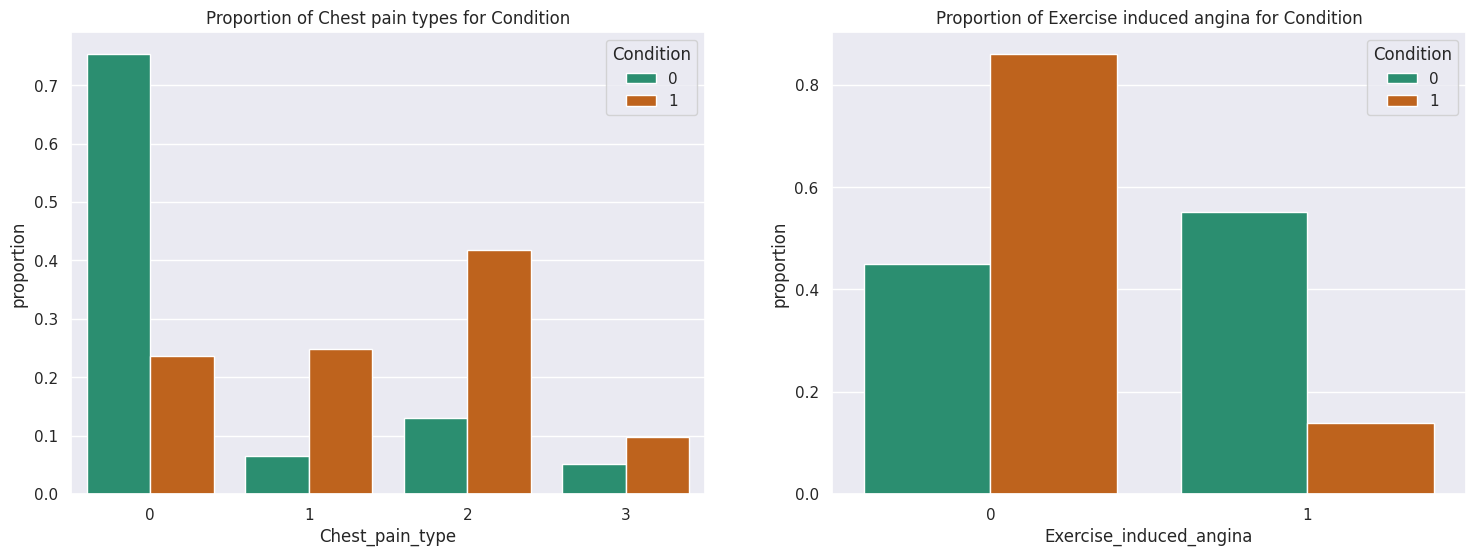

In [ ]:
def symptoms_features_condition(data):
    """
    Plot bar charts of chest pain type and exercise induced angina for Condition.
    """
    fig = plt.figure(figsize=(18, 6))

    plt.subplot(1, 2, 1)
    data['Chest_pain_type'].groupby(data['Condition']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='Chest_pain_type', y='proportion', hue='Condition', palette='Dark2')
    plt.title('Proportion of Chest pain types for Condition')

    plt.subplot(1, 2, 2)
    data['Exercise_induced_angina'].groupby(data['Condition']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='Exercise_induced_angina', y='proportion', hue='Condition', palette='Dark2')
    plt.title('Proportion of Exercise induced angina for Condition')
    plt.show()


symptoms_features_condition(df);

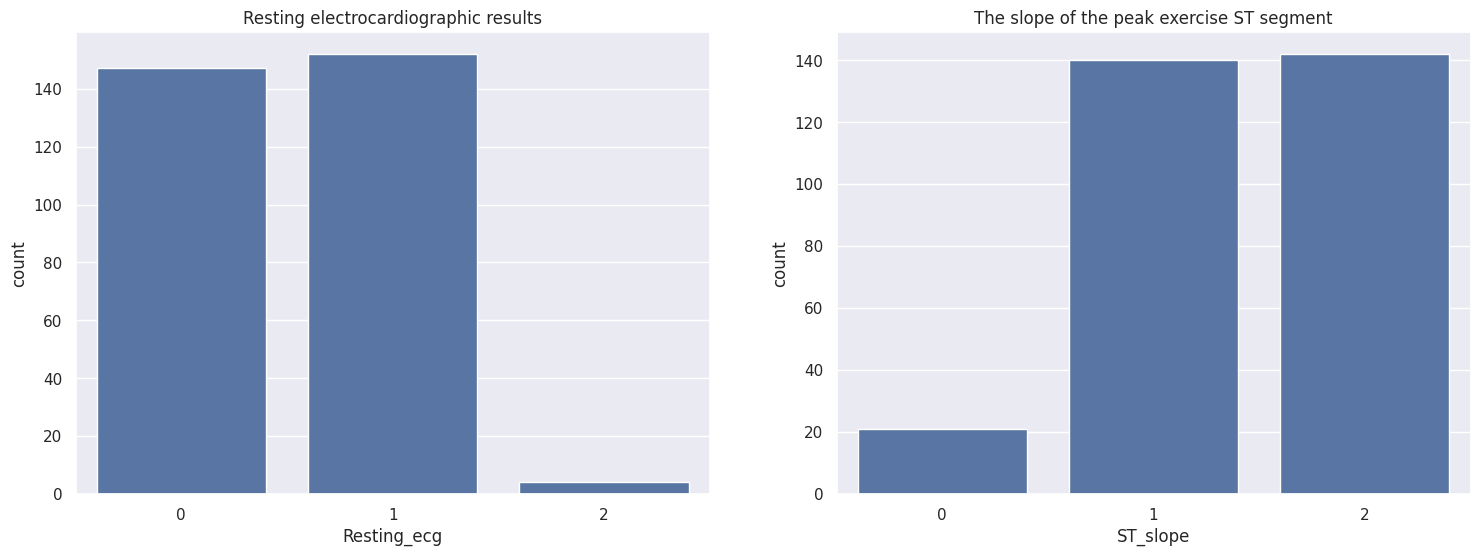

In [ ]:
def heart_functions(data):
    """
    Make a bar chart of Resting_ecg and ST_slope.
    """
    plt.figure(figsize=(18, 6))

    # Resting_ecg
    plt.subplot(1, 2, 1)
    sns.countplot(x='Resting_ecg', data=data)
    plt.title('Resting electrocardiographic results')

    # ST_slope
    plt.subplot(1, 2, 2)
    sns.countplot(x='ST_slope', data=data)
    plt.title('The slope of the peak exercise ST segment')
    plt.show()


heart_functions(df);


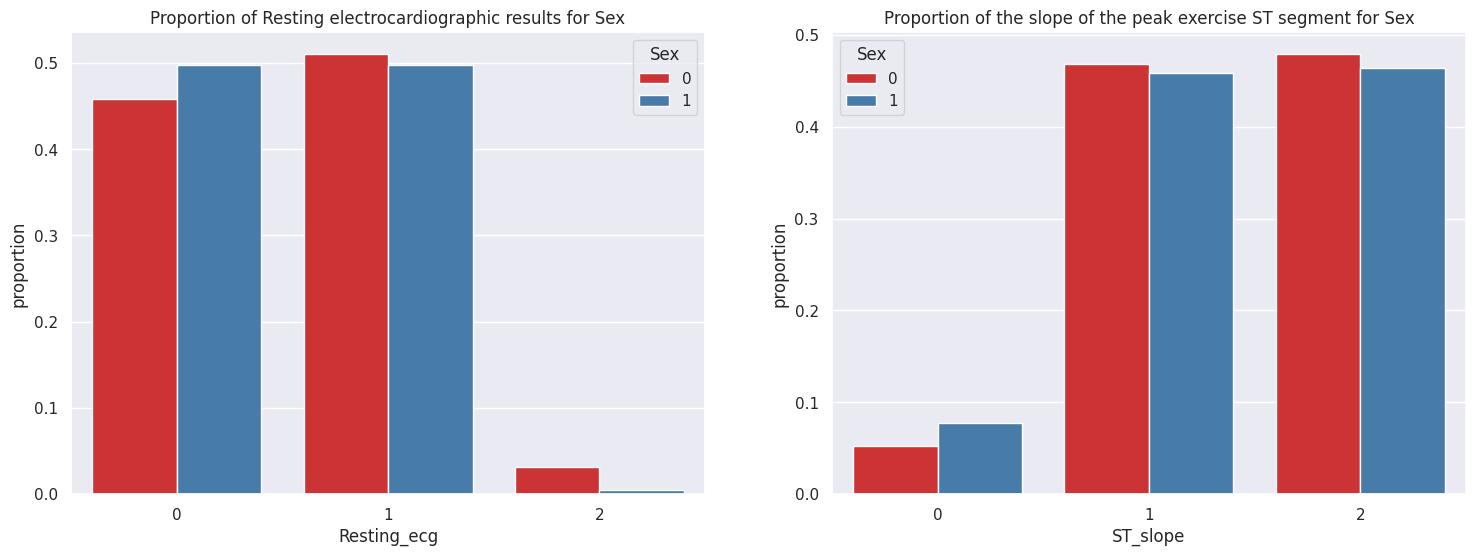

In [ ]:
def heart_functions_sex(data):
    """
    Plot the proportion of Resting_exc and ST_slope for Sex.
    """
    plt.figure(figsize=(18, 6))

    # Resting_ecg
    plt.subplot(1, 2, 1)
    data['Resting_ecg'].groupby(data['Sex']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='Resting_ecg', y='proportion', hue='Sex', palette='Set1')
    plt.title('Proportion of Resting electrocardiographic results for Sex')

    # ST_slope
    plt.subplot(1, 2, 2)
    data['ST_slope'].groupby(data['Sex']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='ST_slope', y='proportion', hue='Sex', palette='Set1')
    plt.title('Proportion of the slope of the peak exercise ST segment for Sex')
    plt.show()


heart_functions_sex(df);

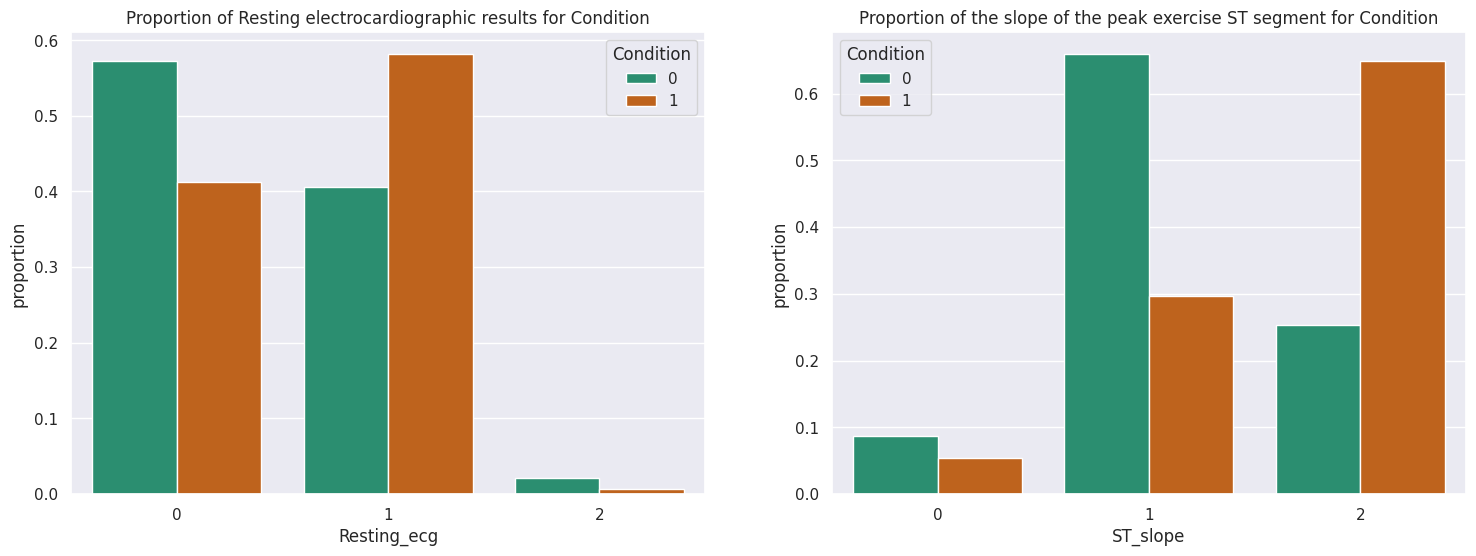

In [ ]:
def heart_functions_condition(data):
    """
    Plot the proportion of Resting_exc and ST_slope for Condition.
    """
    plt.figure(figsize=(18, 6))

    # Resting_ecg
    plt.subplot(1, 2, 1)
    data['Resting_ecg'].groupby(data['Condition']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='Resting_ecg', y='proportion', hue='Condition', palette='Dark2')
    plt.title('Proportion of Resting electrocardiographic results for Condition')


    # ST_slope
    plt.subplot(1, 2, 2)
    data['ST_slope'].groupby(data['Condition']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='ST_slope', y='proportion', hue='Condition', palette='Dark2')
    plt.title('Proportion of the slope of the peak exercise ST segment for Condition')
    plt.show()


heart_functions_condition(df);


<ipython-input-24-98eed1dfc656>:9: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-24-98eed1dfc656>:22: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-24-98eed1dfc656>:23: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use 

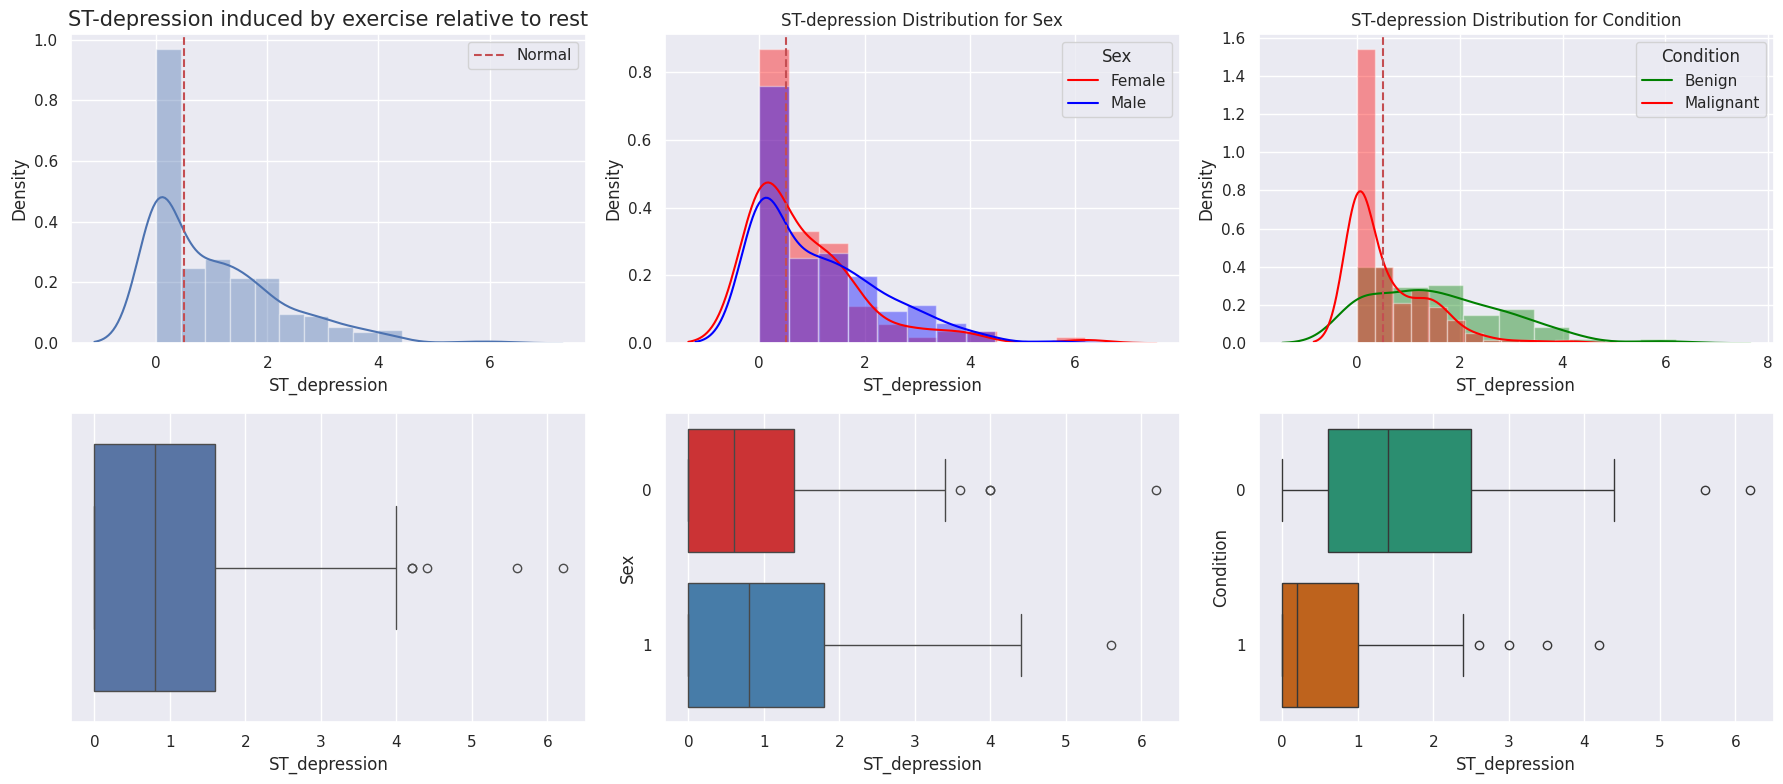

In [ ]:
def heart_functions_sex(data):
    """
    Make a standard distribution of ST_depression and distributions for Sex and Condition.
    """
    fig = plt.figure(figsize=(18, 8))

    # ST-depression induced by exercise relative to rest
    plt.subplot(2, 3, 1)
    sns.distplot(data['ST_depression'])
    plt.title('ST-depression induced by exercise relative to rest', fontsize=15)
    plt.axvline(x=0.5, color='r', linestyle='--', label='Normal')
    plt.legend()

    plt.subplot(2, 3, 4)
    sns.boxplot(data['ST_depression'], orient='h')


    # ST-depression for Sex
    plt.subplot(2, 3, 2)
    chol_female = data[data['Sex']==0]['ST_depression']
    chol_male = data[data['Sex']==1]['ST_depression']
    sns.distplot(chol_female, color='Red')
    sns.distplot(chol_male, color='Blue')
    plt.title('ST-depression Distribution for Sex')
    plt.gca().legend(title='Sex', labels=['Female','Male'])
    plt.axvline(x=0.5, color='r', linestyle='--', label='Normal')

    plt.subplot(2, 3, 5)
    sns.boxplot(x=data['ST_depression'], y=data['Sex'],
                palette='Set1', orient='h')


    # ST-depression for Condition
    plt.subplot(2, 3, 3)
    thalach_b = data[data['Condition']==0]['ST_depression']
    thalach_m = data[data['Condition']==1]['ST_depression']
    sns.distplot(thalach_b, color='Green')
    sns.distplot(thalach_m, color='Red')
    plt.title('ST-depression Distribution for Condition')
    plt.gca().legend(title='Condition', labels=['Benign','Malignant'])
    plt.axvline(x=0.5, color='r', linestyle='--', label='Normal')

    plt.subplot(2, 3, 6)
    sns.boxplot(x=data['ST_depression'], y=data['Condition'],
                palette='Dark2', orient='h')

    plt.tight_layout()
    plt.show()


heart_functions_sex(df);

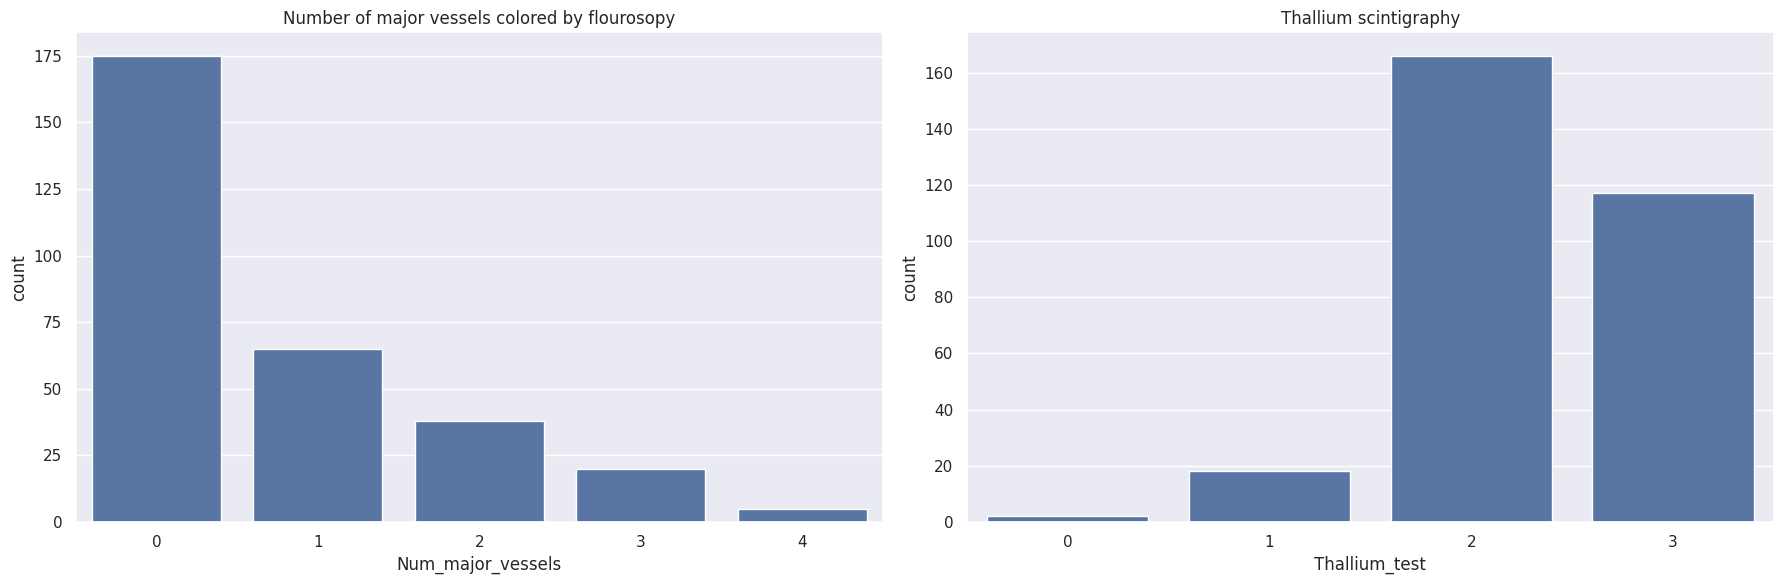

In [ ]:
def heart_functions2(data):
    """
    EDA with numeric variables
    """
    fig = plt.figure(figsize=(18, 6))

    # Num_major_vessels
    plt.subplot(1, 2, 1)
    sns.countplot(x='Num_major_vessels', data=data)
    plt.title('Number of major vessels colored by flourosopy')

    # Thallium
    plt.subplot(1, 2, 2)
    sns.countplot(x='Thallium_test', data=data)
    plt.title('Thallium scintigraphy')

    plt.tight_layout()
    plt.show()


heart_functions2(df);

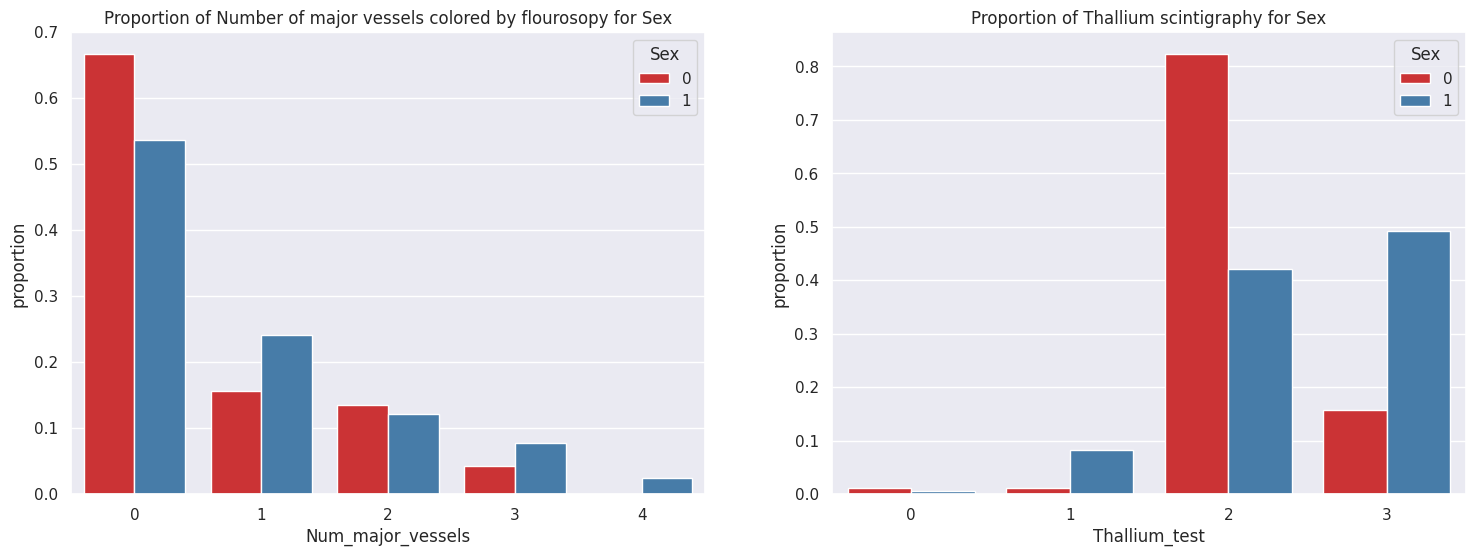

In [ ]:
def heart_functions2_sex(data):
    """
    Plot proportions of Num_major_vessels and Thallium_test for Sex.
    """
    plt.figure(figsize=(18, 6))

    # Num_major_vessels
    plt.subplot(1, 2, 1)
    data['Num_major_vessels'].groupby(data['Sex']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='Num_major_vessels', y='proportion', hue='Sex', palette='Set1')
    plt.title('Proportion of Number of major vessels colored by flourosopy for Sex')

    # Thallium test
    plt.subplot(1, 2, 2)
    data['Thallium_test'].groupby(data['Sex']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='Thallium_test', y='proportion', hue='Sex', palette='Set1')
    plt.title('Proportion of Thallium scintigraphy for Sex')
    plt.show()


heart_functions2_sex(df);

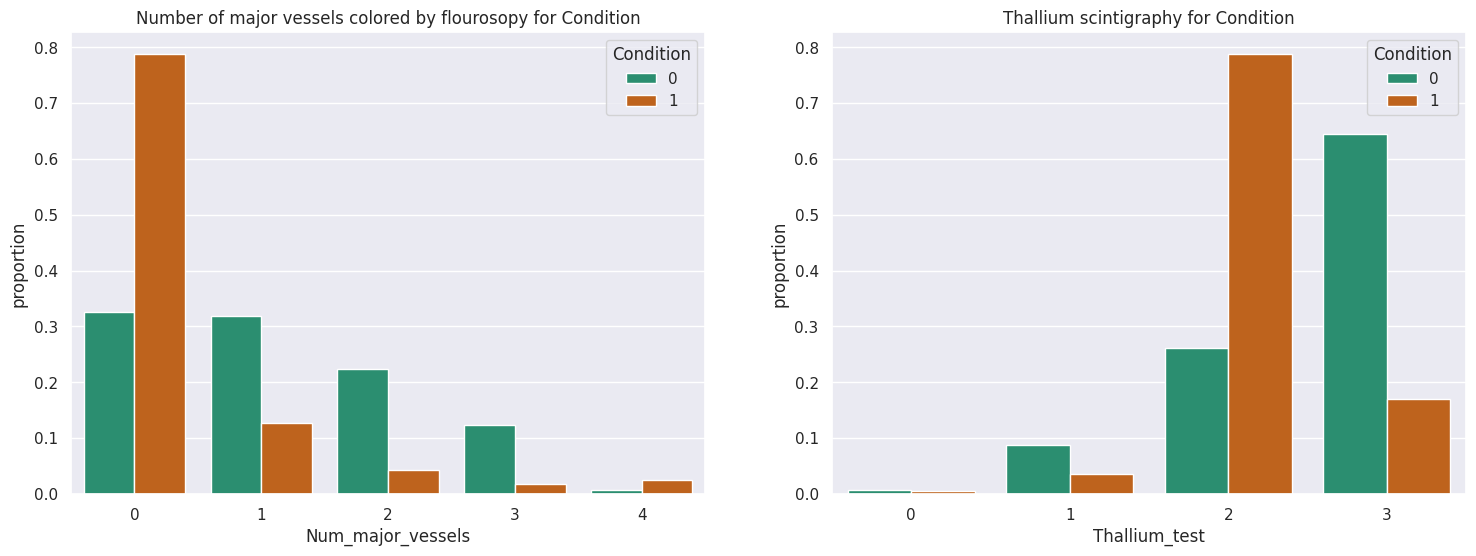

In [ ]:
def heart_functions2_condition(data):
    """
    Plot proportions of Num_major_vessels and Thallium_test for Condition.
    """
    plt.figure(figsize=(18, 6))

    # Num_major_vessels
    plt.subplot(1, 2, 1)
    data['Num_major_vessels'].groupby(data['Condition']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='Num_major_vessels', y='proportion', hue='Condition', palette='Dark2')
    plt.title('Number of major vessels colored by flourosopy for Condition')

    # ST_slope
    plt.subplot(1, 2, 2)
    data['Thallium_test'].groupby(data['Condition']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='Thallium_test', y='proportion', hue='Condition', palette='Dark2')
    plt.title('Thallium scintigraphy for Condition')
    plt.show()


heart_functions2_condition(df);

<ipython-input-28-c9c6d2e3639d>:9: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-28-c9c6d2e3639d>:20: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-28-c9c6d2e3639d>:21: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use 

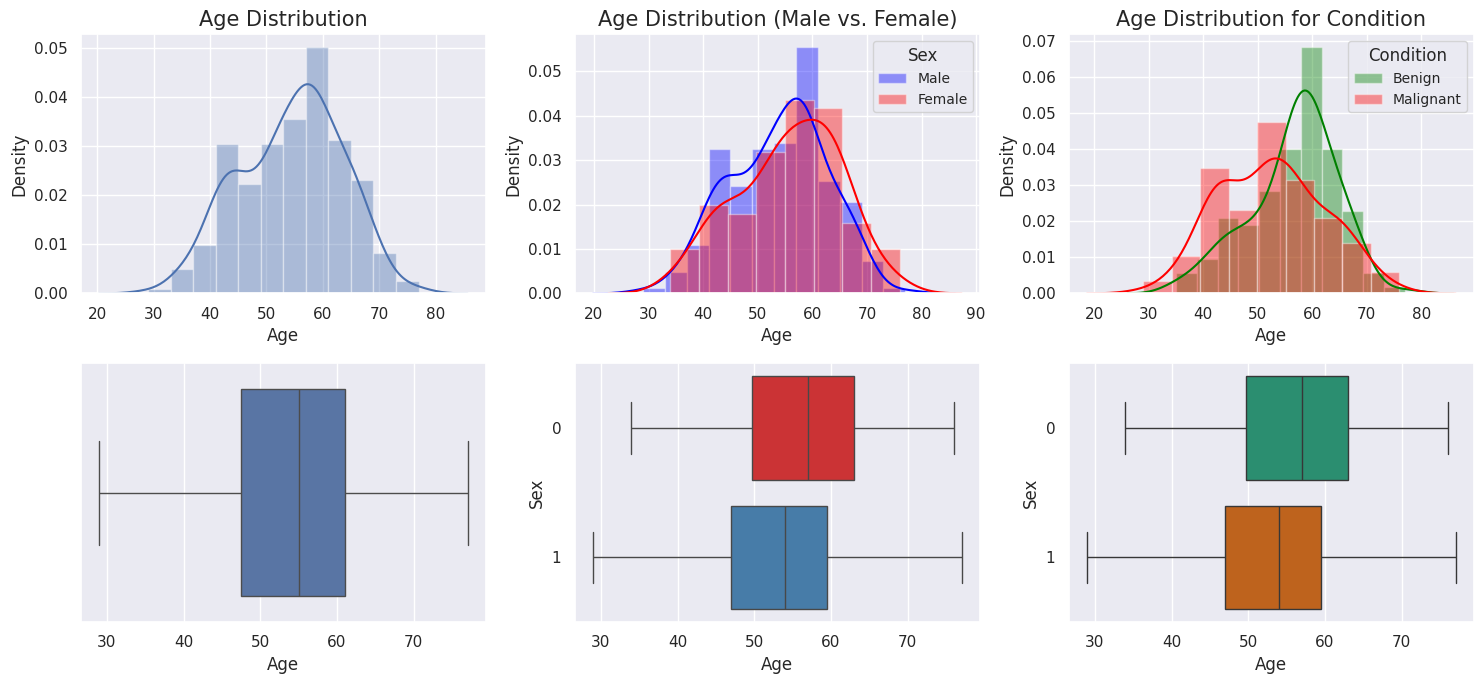

In [ ]:
def age_distribution(data):
    """
    Make a standard distribution and distributions for Sex
    """
    fig = plt.figure(figsize=(15, 7))

    # Age distribution
    plt.subplot(2, 3, 1)
    sns.distplot(data['Age'])
    plt.title('Age Distribution', fontsize=15)

    plt.subplot(2, 3, 4)
    sns.boxplot(data['Age'], orient='h')


    # Age distribution for sex
    plt.subplot(2, 3, 2)
    female = df[df['Sex']==0]['Age']
    male = df[df['Sex']==1]['Age']
    sns.distplot(male, color='Blue', label='Male')
    sns.distplot(female, color='Red', label='Female')
    plt.title('Age Distribution (Male vs. Female)', fontsize=15)
    plt.legend(title='Sex', fontsize=10)

    plt.subplot(2, 3, 5)
    sns.boxplot(x=data['Age'], y=data['Sex'], orient='h', palette='Set1')


    # Age distribution for Condition
    plt.subplot(2, 3, 3)
    benign = df[df['Condition']==0]['Age']
    malignant = df[df['Condition']==1]['Age']

    sns.distplot(benign, color='Green', label='Benign')
    sns.distplot(malignant, color='Red', label='Malignant')
    plt.title('Age Distribution for Condition', fontsize=15)
    plt.legend(title='Condition', fontsize=10)

    plt.subplot(2, 3, 6)
    sns.boxplot(x=data['Age'], y=data['Sex'], orient='h', palette='Dark2')

    plt.tight_layout()
    plt.show()


age_distribution(df)

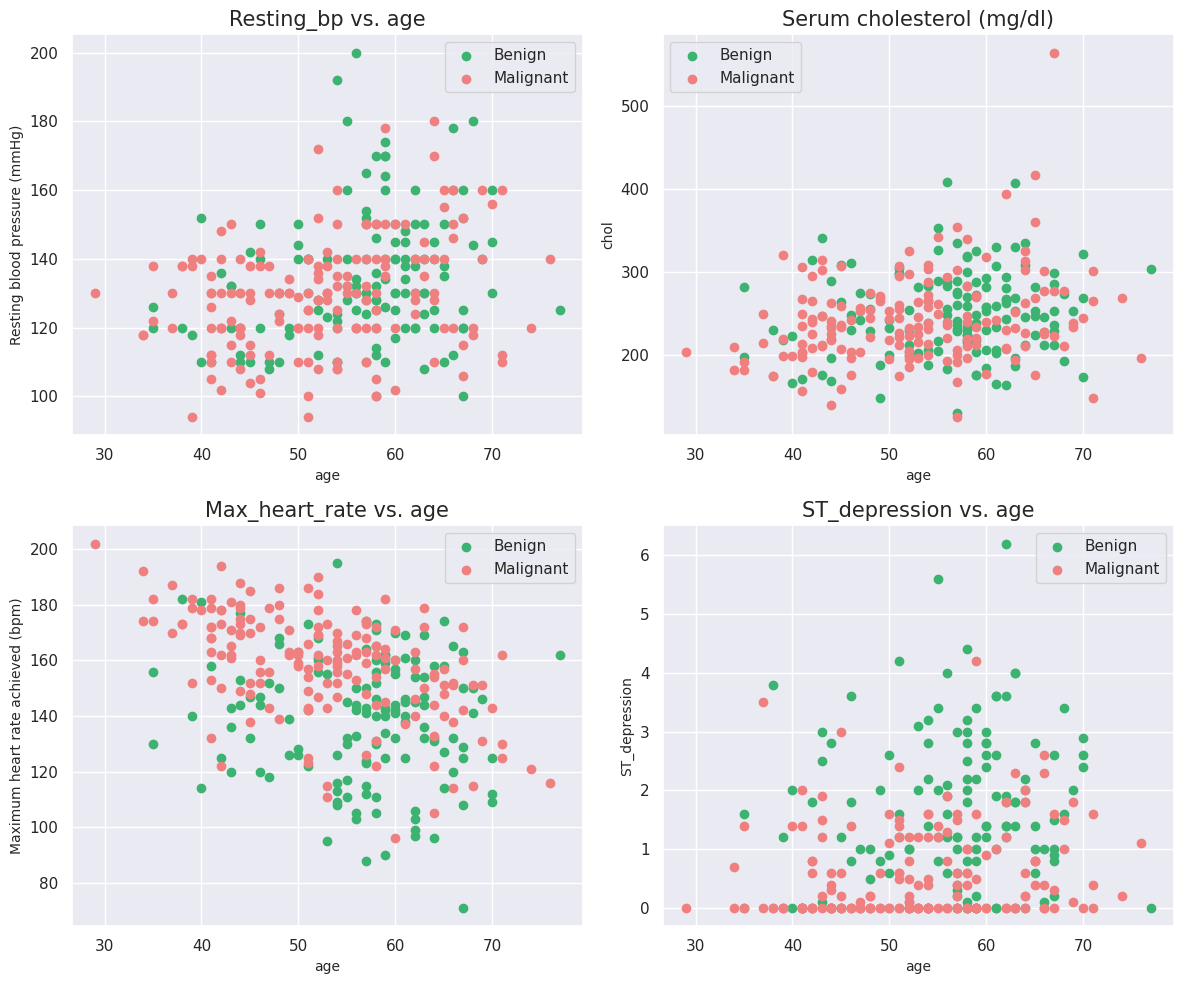

In [ ]:
def numeric_features_vs_age(data):
    """
    Effects of features for heart disease by age
    """
    benign = data.Condition==0
    malignant = data.Condition==1

    age_benign = data.Age[benign]
    age_malignant = data.Age[malignant]

    b_color = 'MediumSeaGreen'
    m_color = 'LightCoral'

    fig = plt.figure(figsize=(12, 10))

    # Resting blood pressure (mmHg)
    plt.subplot(2, 2, 1)
    plt.scatter(x=age_benign, y=data.Resting_bp[benign], color=b_color)
    plt.scatter(x=age_malignant, y=data.Resting_bp[malignant], color=m_color)
    plt.title('Resting_bp vs. age', fontsize=15)
    plt.legend(['Benign', 'Malignant'])
    plt.xlabel('age', fontsize=10)
    plt.ylabel('Resting blood pressure (mmHg)', fontsize=10)


    # Serum Cholesterol (mg/dl)
    plt.subplot(2, 2, 2)
    plt.scatter(x=age_benign, y=data.Cholesterol[benign], color=b_color)
    plt.scatter(x=age_malignant, y=data.Cholesterol[malignant], color=m_color)
    plt.title('Serum cholesterol (mg/dl)', fontsize=15)
    plt.legend(['Benign', 'Malignant'])
    plt.xlabel('age', fontsize=10)
    plt.ylabel('chol', fontsize=10)


    # Maximum heart rate achieved (bpm)
    plt.subplot(2, 2, 3)
    plt.scatter(x=age_benign, y=data.Max_heart_rate[benign], color=b_color)
    plt.scatter(x=age_malignant, y=data.Max_heart_rate[malignant], color=m_color)
    plt.title('Max_heart_rate vs. age', fontsize=15)
    plt.legend(['Benign', 'Malignant'])
    plt.xlabel('age',fontsize=10)
    plt.ylabel('Maximum heart rate achieved (bpm)', fontsize=10)


    # ST_depression
    plt.subplot(2, 2, 4)
    plt.scatter(x=age_benign, y=data.ST_depression[benign], color=b_color)
    plt.scatter(x=age_malignant, y=data.ST_depression[malignant], color=m_color)
    plt.title('ST_depression vs. age', fontsize=15)
    plt.legend(['Benign', 'Malignant'])
    plt.xlabel('age',fontsize=10)
    plt.ylabel('ST_depression', fontsize=10)

    plt.tight_layout()
    plt.show()


numeric_features_vs_age(df);

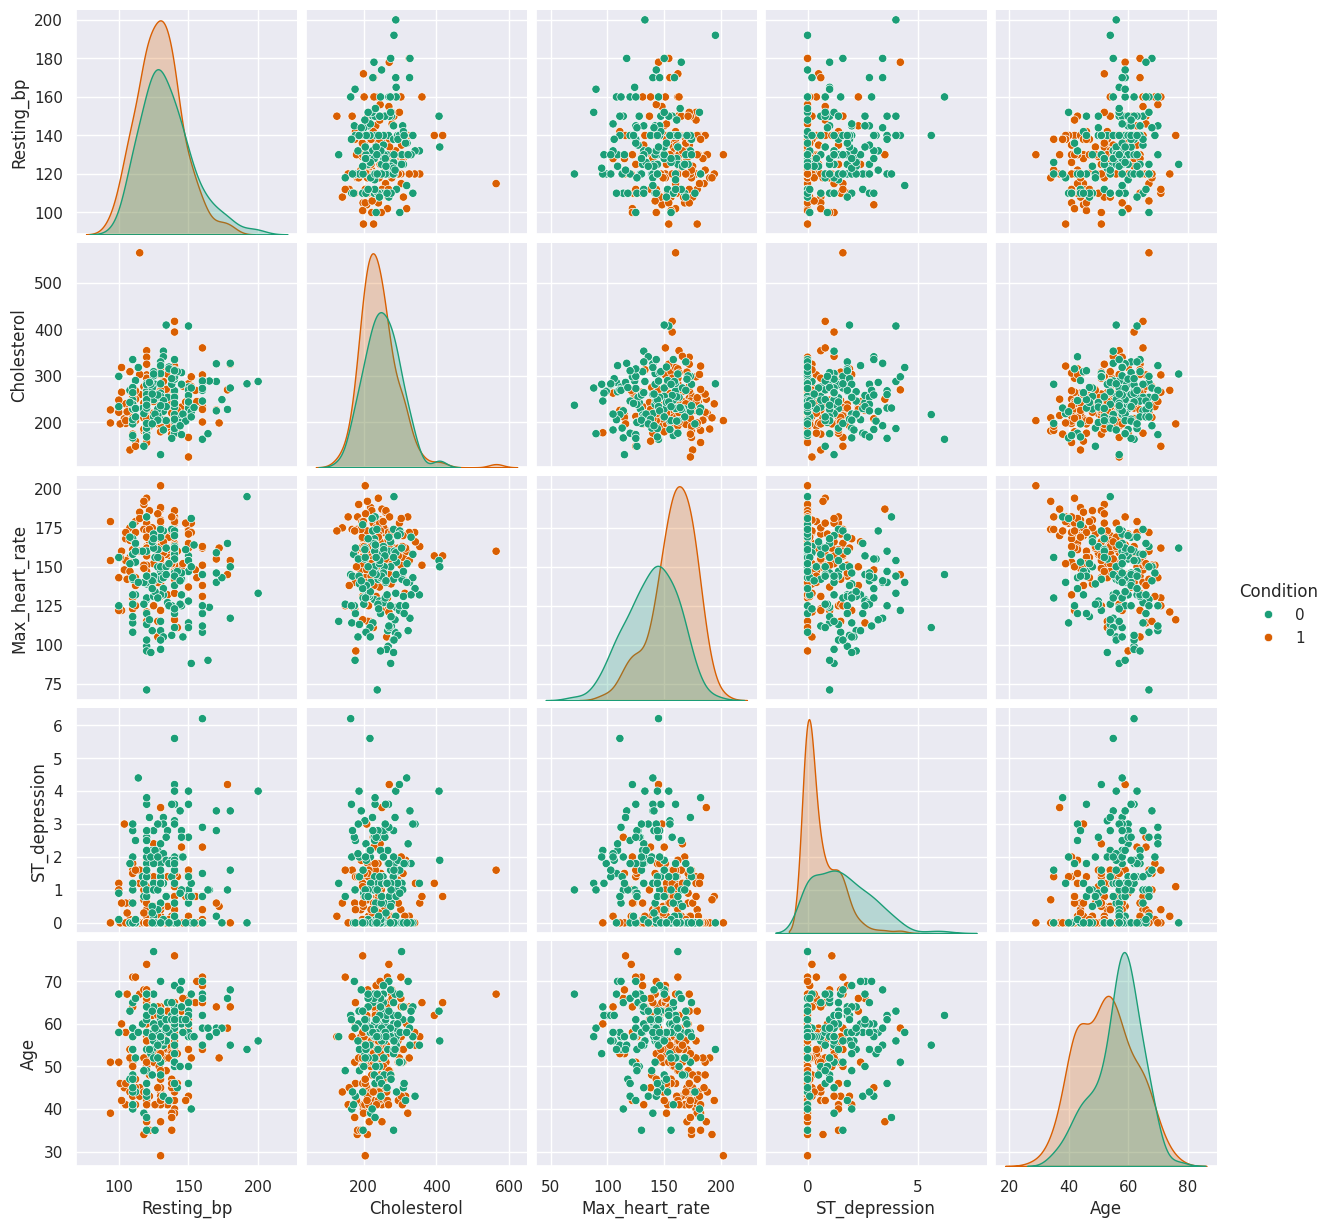

In [ ]:
sns.pairplot(df[['Resting_bp','Cholesterol','Max_heart_rate','ST_depression','Age', 'Condition']],hue='Condition', palette='Dark2');

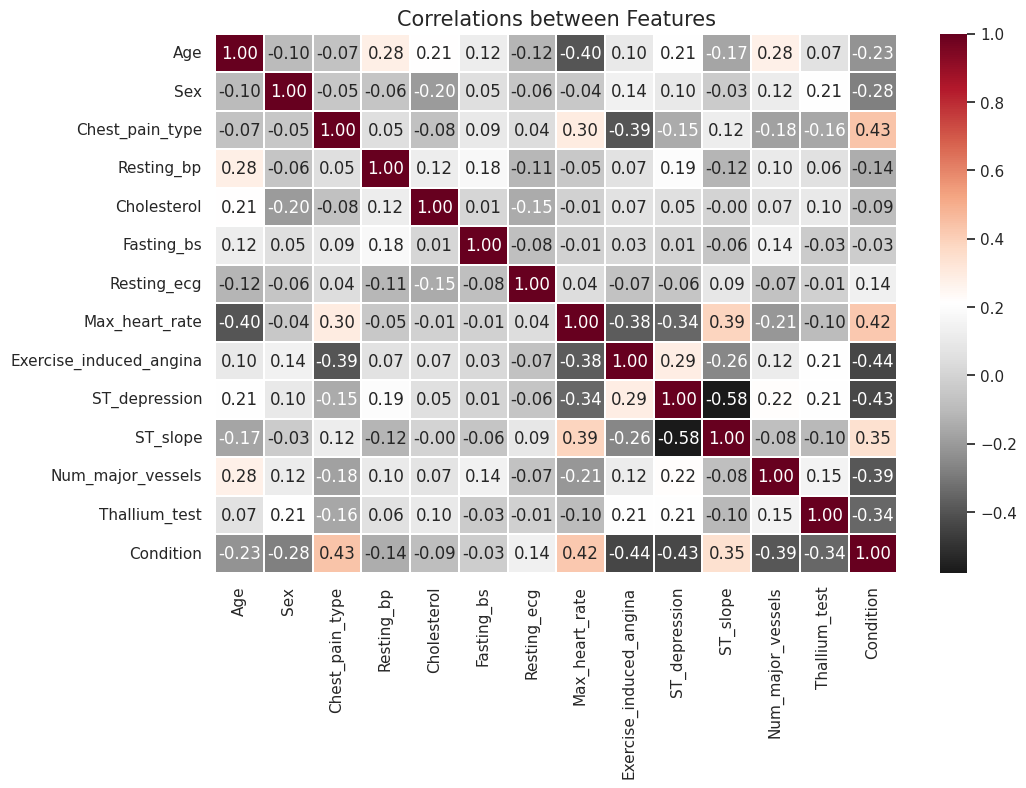

In [ ]:
def correlation_heatmap(data):
    """
    Correlation Heat Map of the features.
    """
    plt.figure(figsize=(11, 7))
    sns.heatmap(data.corr(), annot=True, linewidth=0.2,
                fmt='.2f', cmap='RdGy_r')
    plt.title('Correlations between Features', fontsize=15)
    plt.show()


correlation_heatmap(df);